<a href="https://colab.research.google.com/github/SelenaNahra/MachineLearning/blob/main/HW2PROB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW #2

Problem 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)


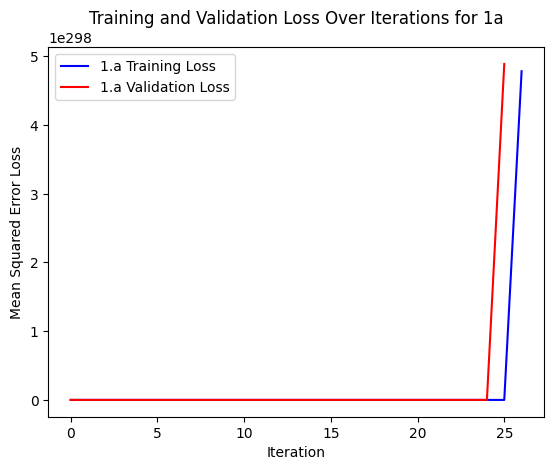

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)


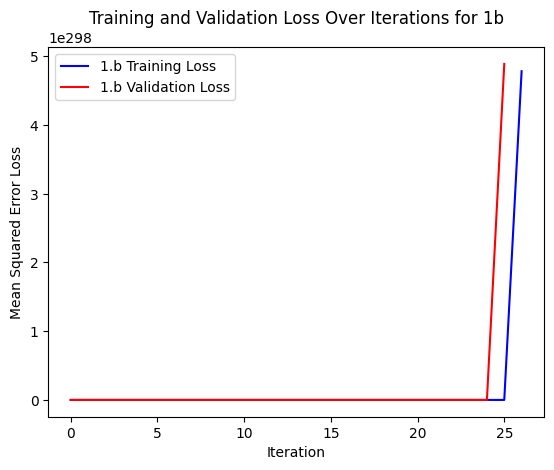

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive and load the dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Housing.csv'
housing = pd.read_csv(file_path)

# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_training, df_validation = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

y_train = df_training.pop('price')
y_valid = df_validation.pop('price')

def train(X, df_training, df_validation, y_train, y_valid, learning_rate, iterations):
    training_inputs = df_training[X]
    x_train = np.c_[np.ones((len(training_inputs), 1)), training_inputs]

    val_inputs = df_validation[X]
    x_val = np.c_[np.ones((len(val_inputs), 1)), val_inputs]

    n = x_train.shape[1]
    m_train = len(x_train)
    m_valid = len(x_val)
    theta = np.zeros(n)

    train_losses = []
    val_losses = []

    for i in range(iterations):
        h_theta = x_train.dot(theta)
        error = np.subtract(h_theta, y_train)
        gradient = (1 / m_train) * (x_train.transpose().dot(error))

        theta -= (learning_rate * gradient)

        train_loss = 1 / (2 * m_train) * np.sum(np.square((h_theta - y_train)))
        val_loss = 1 / (2 * m_valid) * np.sum(np.square((x_val.dot(theta) - y_valid)))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses

# Create data for 1.a
X = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
learning_rate = 0.01
iterations = 50

train_losses, val_losses = train(X, df_training, df_validation, y_train, y_valid, learning_rate, iterations)

# Plot the training and validation losses for 1.a
plt.plot(train_losses, label='1.a Training Loss', color='blue')
plt.plot(val_losses, label='1.a Validation Loss', color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.title('Training and Validation Loss Over Iterations for 1a')
plt.show()

X = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea' ]
learning_rate = 0.01
iterations = 50

train_losses, val_losses = train(X, df_training, df_validation, y_train, y_valid, learning_rate, iterations)

# Plot the training and validation losses for 1.b
plt.plot(train_losses, label='1.b Training Loss', color='blue')
plt.plot(val_losses, label='1.b Validation Loss', color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.title('Training and Validation Loss Over Iterations for 1b')
plt.show()